# Import some important libaraies :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings:

In [2]:
import warnings
warnings.simplefilter("ignore")

# Display all columns and rows in the output :

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)


# Load our data :

In [4]:
train=pd.read_csv('traintai.csv')
test=pd.read_csv('testtai.csv')

# Let's have imformation about the dataset:

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* i will convert 'Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked' to category 

In [10]:
train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']]=train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']].astype('category')

In [11]:
train.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [12]:
train.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [13]:
#show if there are full duplicates 
train.duplicated().sum()

0

* there are no duplicates

In [14]:
nans = train.isna().sum().sort_values(ascending=False)
pct = 100 * nans / train.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_nans', 'percentage_of_nans']
nan_stats

,num_of_nans,percentage_of_nans
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


* i will drop 'Cabin' column cause it has a lot of missing values
* 'Name','Ticket','PassengerId' is non important columns

In [15]:
train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [16]:
test.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

* i will drop missing values in Embarked column because it just 2

In [17]:
train.dropna(subset=['Embarked'], inplace=True)

In [18]:
train.isna().sum().sum()

177

* there aren't missing values

# EDA :

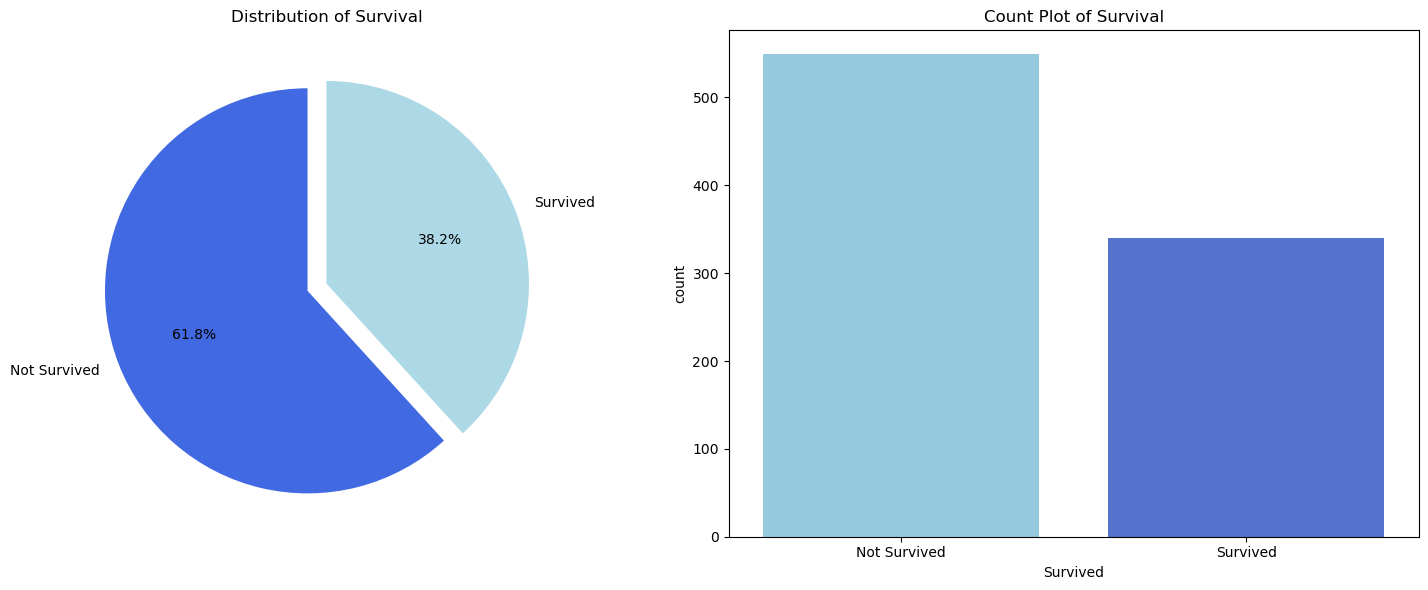

In [19]:


# Define colors
light_blue = '#ADD8E6'
sky_blue = '#87CEEB'
dodger_blue = '#1E90FF'
royal_blue = '#4169E1'

explode = (0.1, 0)  


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for the distribution of survival
survival_counts = train['Survived'].value_counts()
axes[0].pie(
    survival_counts,
    labels=['Not Survived', 'Survived'],
    autopct='%1.1f%%',
    startangle=90,
    colors=[royal_blue, light_blue],
    explode=explode  
)
axes[0].set_title('Distribution of Survival')

# Count plot for survival count
sns.countplot(
    x='Survived',
    data=train,
    palette=[sky_blue, royal_blue],  
    ax=axes[1]
)
axes[1].set_title('Count Plot of Survival')
axes[1].set_xticklabels(['Not Survived', 'Survived'])

# Adjust layout
plt.tight_layout()
plt.show()


* i have imbalanced data so i will deal with it

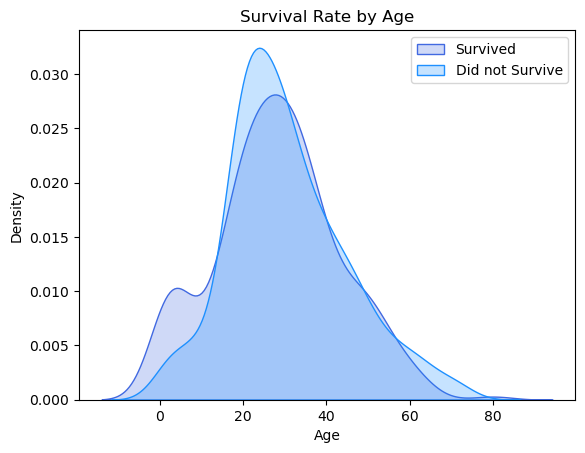

In [20]:
sns.kdeplot(
    train[train['Survived'] == 1]['Age'],
    shade=True,
    color=royal_blue,
    label='Survived'
)

sns.kdeplot(
    train[train['Survived'] == 0]['Age'],
    shade=True,
    color=dodger_blue,
    label='Did not Survive'
)


plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

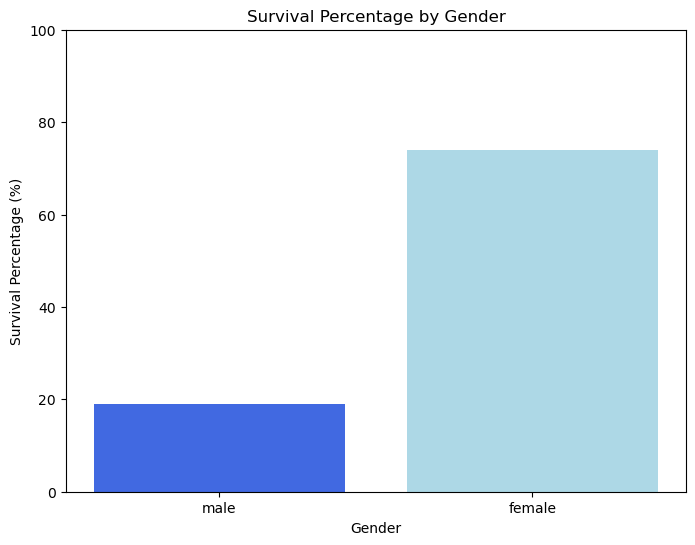

In [21]:

survival_percentages = {}

# Calculate survival percentage by gender
for gen in train['Sex'].unique():
    gender_df = train[train['Sex'] == gen]
    survived = gender_df[gender_df['Survived'] == 1]
    survived_percentage = (survived.shape[0] / gender_df.shape[0]) * 100
    survival_percentages[gen] = survived_percentage

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(survival_percentages.keys(), survival_percentages.values(), color=[royal_blue, light_blue])
plt.xlabel('Gender')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Gender')
plt.ylim(0, 100)  
plt.show()

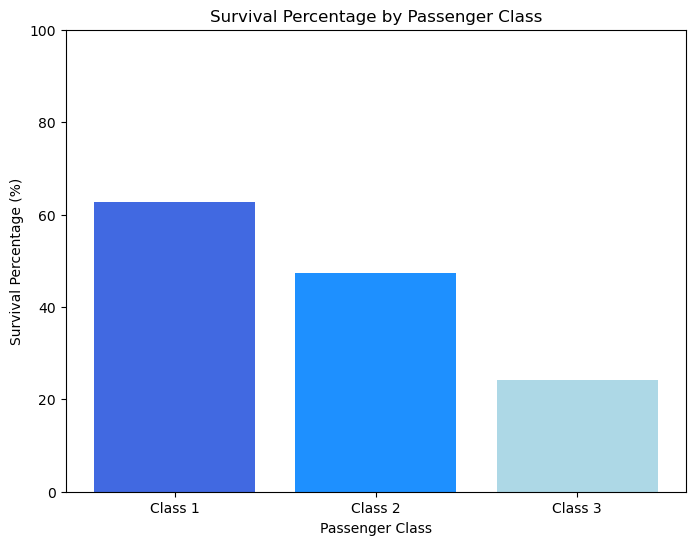

In [22]:
# Define colors for each Pclass
colors = {
    1: royal_blue,
    2: dodger_blue ,
    3: light_blue
}

# Initialize dictionary to store survival percentages by Pclass
survival_percentages_by_class = {}

# Calculate survival percentage by Pclass
for p_class in train['Pclass'].unique():
    class_df = train[train['Pclass'] == p_class]
    survived = class_df[class_df['Survived'] == 1]
    survived_percentage = (survived.shape[0] / class_df.shape[0]) * 100
    survival_percentages_by_class[p_class] = survived_percentage

# Plotting
plt.figure(figsize=(8, 6))

# Retrieve colors for the classes
plot_colors = [colors.get(p_class, royal_blue) for p_class in survival_percentages_by_class.keys()]

plt.bar(survival_percentages_by_class.keys(), survival_percentages_by_class.values(), color=plot_colors)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Passenger Class')
plt.ylim(0, 100)  
plt.xticks(ticks=list(survival_percentages_by_class.keys()), labels=[f'Class {i}' for i in survival_percentages_by_class.keys()])

plt.show()

In [23]:
def age_to_category(Age):
    if Age < 4:
        return 0  # "baby"
    elif Age < 10:
        return 1  # "child"
    elif Age < 21:
        return 2  # "teen"
    elif Age < 33:
        return 3  # "young adult"
    elif Age < 50:
        return 4  # "adult"
    return 5  # "elder"

# Apply the function to create a new column 'AgeCat'
train['Age_Cat'] = train['Age'].apply(age_to_category)


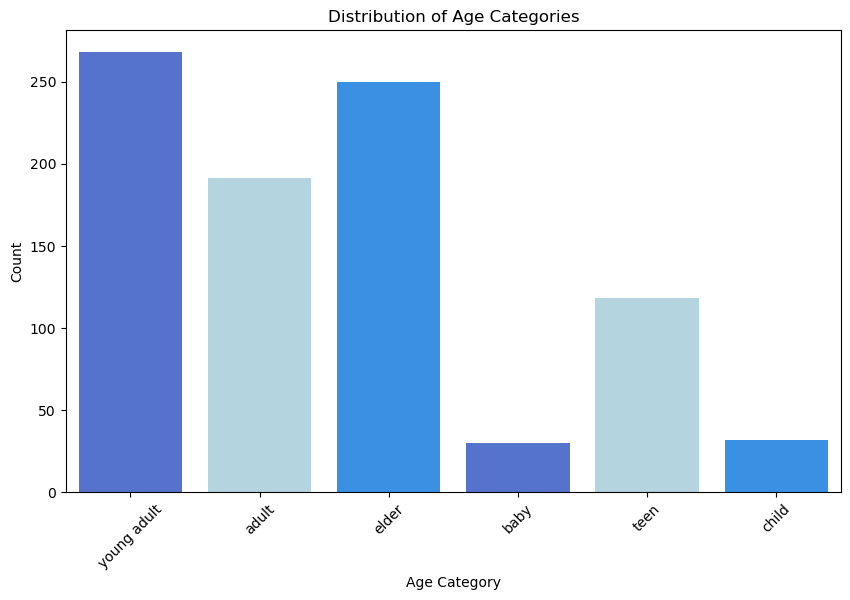

In [24]:
age_cats = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "young adult",
    4: "adult",
    5: "elder"
}

# Replace the numerical categories with descriptive names for the plot
train['Age_Cat'] = train['Age_Cat'].map(age_cats)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Cat', data=train, palette=[royal_blue, light_blue, dodger_blue])
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

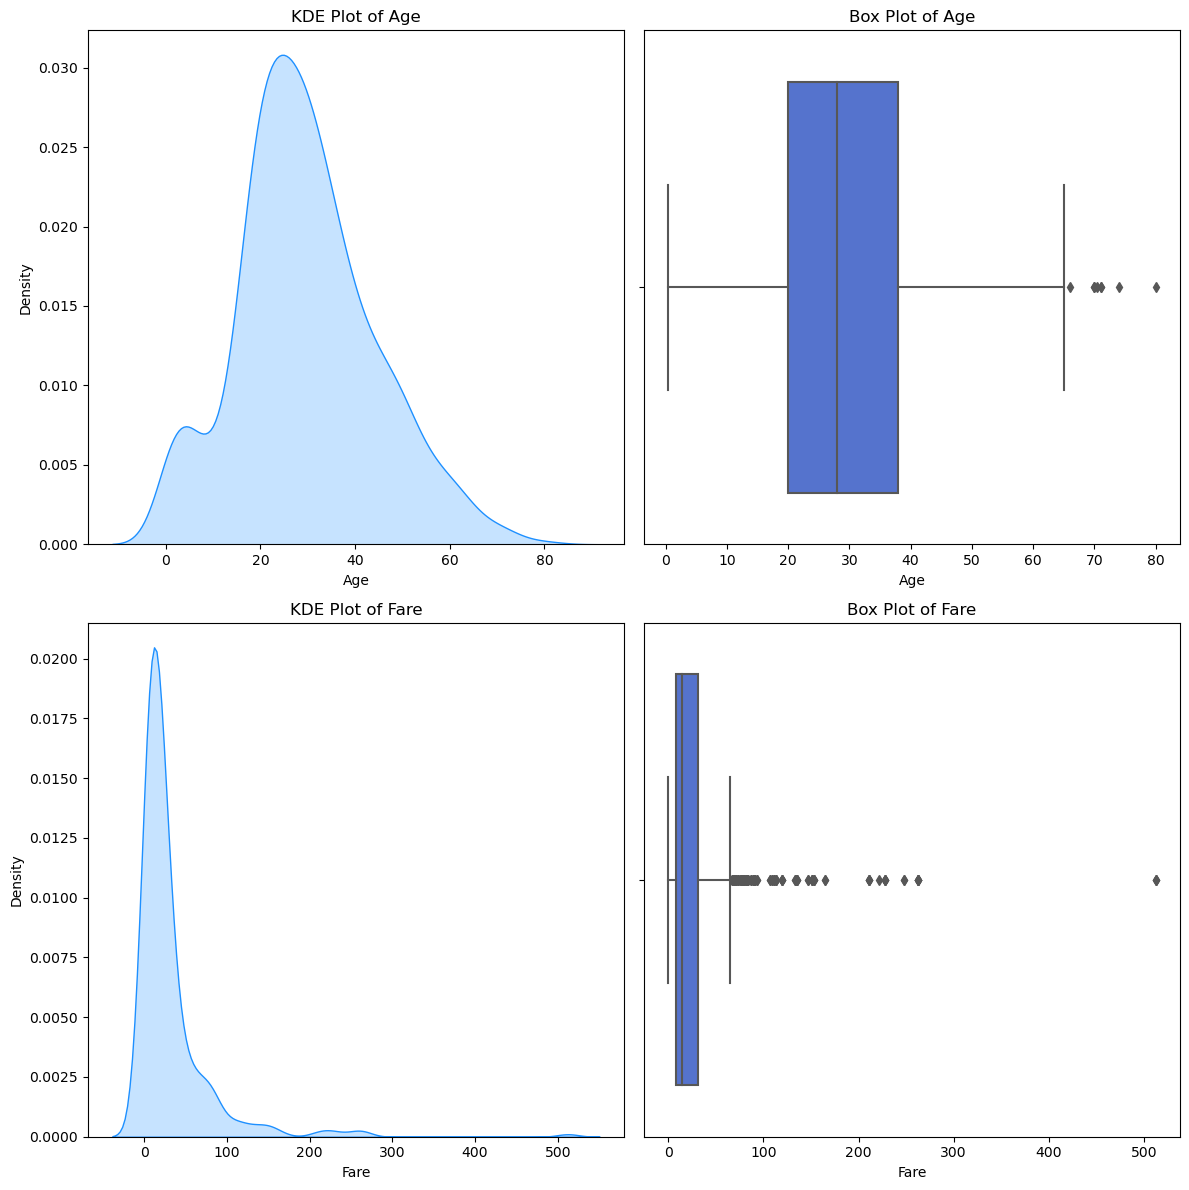

In [25]:
# Define numerical columns to plot
numerical_columns = ['Age', 'Fare']  # Add or modify columns as needed

# Create subplots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 6 * len(numerical_columns)))

# Iterate over numerical columns
for i, col in enumerate(numerical_columns):
    # KDE Plot
    sns.kdeplot(train[col], ax=axes[i, 0], fill=True, color='dodgerblue')
    axes[i, 0].set_title(f'KDE Plot of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Density')
    
    # Box Plot
    sns.boxplot(x=train[col], ax=axes[i, 1], color='Royalblue')
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

# preprocessing::

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
# Define numeric and categorical features
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
# Create preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()) 
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Modeling:

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [29]:
x_train = train.drop(columns =[ 'Survived','Age_Cat'])
y_train = train['Survived']
x_test = test.drop(columns = 'PassengerId')

In [31]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('classifier', VotingClassifier(estimators=[
        ('logreg', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('gbc', GradientBoostingClassifier()),
        ('sgd', SGDClassifier(loss='log')),
        ('dt', DecisionTreeClassifier())
    ], voting='soft'))
])


In [32]:
param_grid = {
    # Logistic Regression
    'classifier__logreg__C': [0.1, 1.0, 10],

    # Random Forest
    'classifier__rf__n_estimators': [50, 100],

    # Gradient Boosting
    'classifier__gbc__learning_rate': [0.1, 0.2],
    'classifier__gbc__n_estimators': [50, 100],

    # Decision Tree
    'classifier__dt__max_depth': [10, 20],

    # SGD Classifier
    'classifier__sgd__alpha': [0.0001, 0.001]
}


In [33]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                              

In [34]:
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_

Best Parameters: {'classifier__dt__max_depth': 20, 'classifier__gbc__learning_rate': 0.1, 'classifier__gbc__n_estimators': 100, 'classifier__logreg__C': 1.0, 'classifier__rf__n_estimators': 100, 'classifier__sgd__alpha': 0.0001}


In [35]:

y_pred = best_estimator.predict(x_test)


In [40]:
cv_scores = cross_val_score(best_estimator, x_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy scores: {cv_scores}')
print(f'Mean cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy scores: [0.78089888 0.79775281 0.81460674 0.78089888 0.83050847]
Mean cross-validated accuracy: 0.8009331555894115


In [37]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('submitai.csv', index=False)